# 회귀 트리란
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것
- 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프노드에 속한 데이터 값의 평균값을 구해 회귀 예측 값을 계산

# 회귀 트리 결정값 과정
- 루트 노드를 Split 0 기준으로 분할함
![image](https://user-images.githubusercontent.com/70187490/131073569-897b9101-0a0d-404f-b4c4-0df95002d11e.png)

- 이렇게 분할 한 규칙 노드에서 다시 Split 1과 Split 2 규칙 노드로 분할
![image](https://user-images.githubusercontent.com/70187490/131073600-d24fbf81-9680-43e4-87c5-a00d1f9158e7.png)

- 다시 Split 3 규칙 노드로 트리 규칙을 변환한 후 리프 노드에 소속된 데이터 값의 평균값을 구하여 결정 값으로 할당
![image](https://user-images.githubusercontent.com/70187490/131073704-17255ddd-9c35-4b8d-89ac-c2c1a7733589.png)<파이썬 머신러닝 완벽 가이드 발췌>

- 결정트리, 랜덤포레스트, GBM, XGBoost, LightGBM의 트리 기반 알고리즘은 분류 뿐만 아니라 회귀도 가능함
- 이 5개의 트리는 CART(Classification And Regression Trees)

> 랜덤포레스트 회귀 트리를 이용해 보스턴 주택 가격 예측을 수행하는 예시

In [17]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE: 4.423


> 결정트리, GBM, XGBoost, LightGBM을 모두 이용해 보스턴 주택 가격 예측

In [18]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print(' 5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm  import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg= XGBRegressor(n_estimators=1000)
lgb_reg= LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE: 5.978
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE: 4.423
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE: 4.269
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE: 4.251
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE: 4.646


<AxesSubplot:>

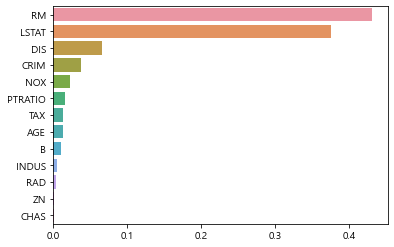

In [24]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

> 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형회귀와 비교하는 예시
- 결정 트리 하이퍼 파라미터인 max_depth의 크기를 변화시킬 때의 회귀 트리 예측선의 변화

(100, 2)


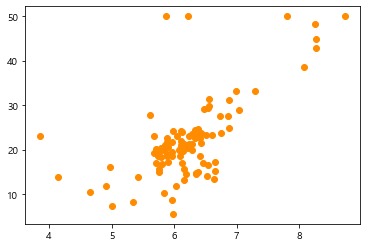

In [26]:
import matplotlib.pyplot as plt

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [28]:
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

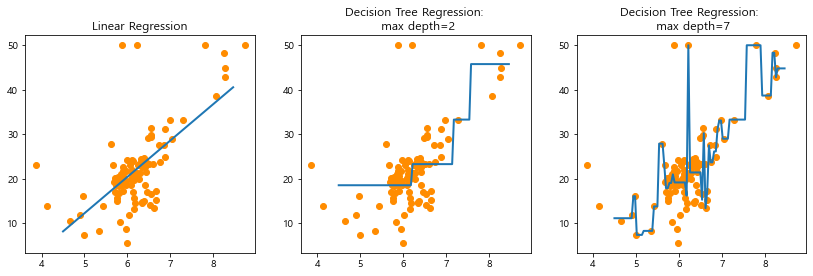

In [32]:
# 각각 학습된 모델의 Price 회귀선 그리기

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# X축 값을 4.5 ~ 8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth=3', linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth=7', linewidth=2)

- 선형 회귀는 직선으로 예측 회귀선을 너무 단순하게 예측
- 회귀 트리는 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태의 회귀선을 만듬
- max_depth=7의 경우 이상치도 핛브하면서 과적합이 되기 쉬운 모델이 되었음